# Multi-Linear Regression

In [127]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse,r2_score as r2,mean_absolute_error as mae
from sklearn.preprocessing import StandardScaler, minmax_scale
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import statsmodels.formula.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
plt.style.use('dark_background')

In [85]:
def AdjR(r2, p, n):
    R2_Adj = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
    return R2_Adj

In [3]:
sales = pd.read_csv('position_sales.csv')

In [106]:
sales.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
Position    10 non-null object
Level       10 non-null int64
Salary      10 non-null int64
dtypes: int64(2), object(1)
memory usage: 320.0+ bytes


In [107]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
Position    10 non-null object
Level       10 non-null int64
Salary      10 non-null int64
dtypes: int64(2), object(1)
memory usage: 320.0+ bytes


# Linear Regression

In [28]:
X1 = sales['Level']
X1 = pd.DataFrame(X1)
Y1 = sales['Salary']
Y1 = pd.DataFrame(Y1)

In [29]:
regressor1 = LinearRegression()
regressor1.fit(X1, Y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [87]:
intercept1, coef1 = regressor1.intercept_, regressor1.coef_
print('Intercept: ', intercept1, '\n', 'Coef: ', coef1 ) 

Intercept:  [-195333.33333333] 
 Coef:  [[80878.78787879]]


In [30]:
Y_hat1 = regressor1.predict(X1)

In [92]:
mae1, mse1, rmse1, R21 = mae(Y1, Y_hat1), mse(Y1, Y_hat1),math.sqrt(mse(Y1, Y_hat1)), r2(Y1, Y_hat1)
mae1, mse1,rmse1, R21


(128454.54545454546,
 26695878787.878784,
 163388.73519272613,
 0.6690412331929895)

In [97]:
r21adj = AdjR(R21, sales.shape[1], sales.shape[0])
r21adj

0.5035618497894843

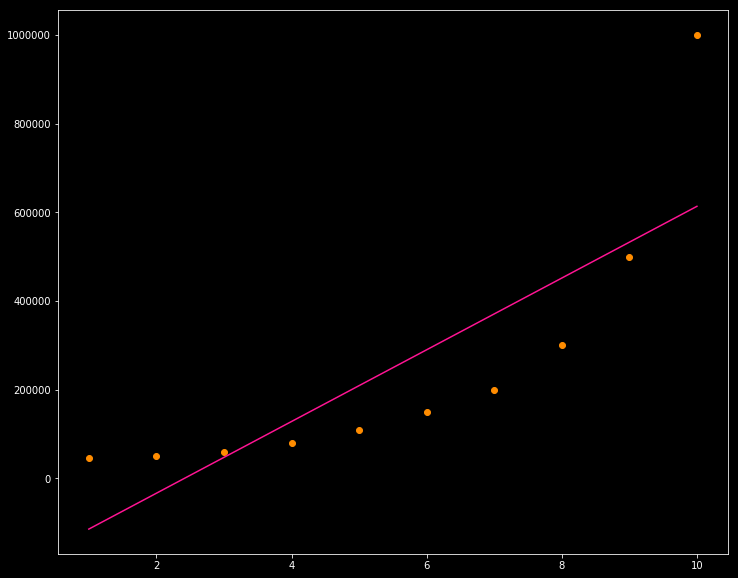

In [117]:
plt.figure(figsize=(12, 10))
plt.scatter(X1, Y1, color = 'darkorange')
plt.plot(X1, Y_hat1, color = 'deeppink')
plt.show()

# Polynomial regression

In [118]:
poly_regressor1 = PolynomialFeatures(degree = 10)
X_poly1 = poly_regressor1.fit_transform(X1)


In [119]:
regressor2 = LinearRegression()
regressor2.fit(X_poly1, Y1)
Y_hat_poly1 = regressor2.predict(X_poly1)
poly_regressor1.fit(X_poly1, Y1)
Y_hat_poly1 = pd.DataFrame(Y_hat_poly1)

In [120]:
intercept2, coef2 = regressor2.intercept_, regressor2.coef_
print('Intercept: ', intercept2, '\n', 'Coef: ', coef2 ) 

Intercept:  [-44796.69263923] 
 Coef:  [[ 5.04226442e+00  1.46820300e+05 -1.30632216e+03 -1.34291025e+05
   1.17468501e+05 -4.93479463e+04  1.21106506e+04 -1.81903985e+03
   1.64592991e+02 -8.23590727e+00  1.75046399e-01]]


In [121]:
mae2, mse2, rmse2, R22  = mae(Y1, Y_hat_poly1), mse(Y1, Y_hat_poly1),math.sqrt(mse(Y1, Y_hat_poly1)), r2(Y1, Y_hat_poly1)
mae2, mse2,rmse2, R22 

(0.00042434404749656094, 4.901387772411674e-07, 0.0007000991195831969, 1.0)

In [122]:
r22adj = AdjR(R22, X_poly1.shape[1], X_poly1.shape[0])
r22adj

1.0

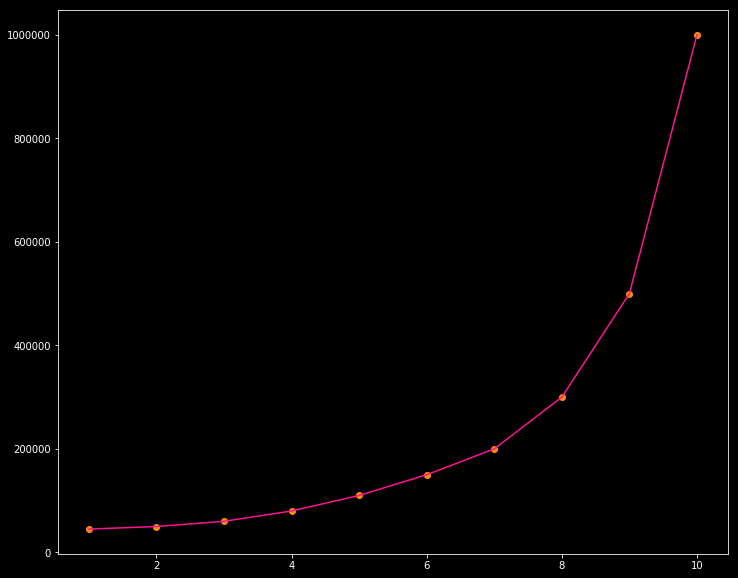

In [123]:
plt.figure(figsize=(12, 10))
plt.scatter(X1, Y1, color = 'darkorange')
plt.plot(X1, Y_hat_poly1, color = 'deeppink')
plt.show()

In [66]:
X_poly1 = pd.DataFrame(X_poly1)
X_poly1.head()

,0,1,2,3,4,5
0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,2.0,4.0,8.0,16.0,32.0
2,1.0,3.0,9.0,27.0,81.0,243.0
3,1.0,4.0,16.0,64.0,256.0,1024.0
4,1.0,5.0,25.0,125.0,625.0,3125.0


# scaled

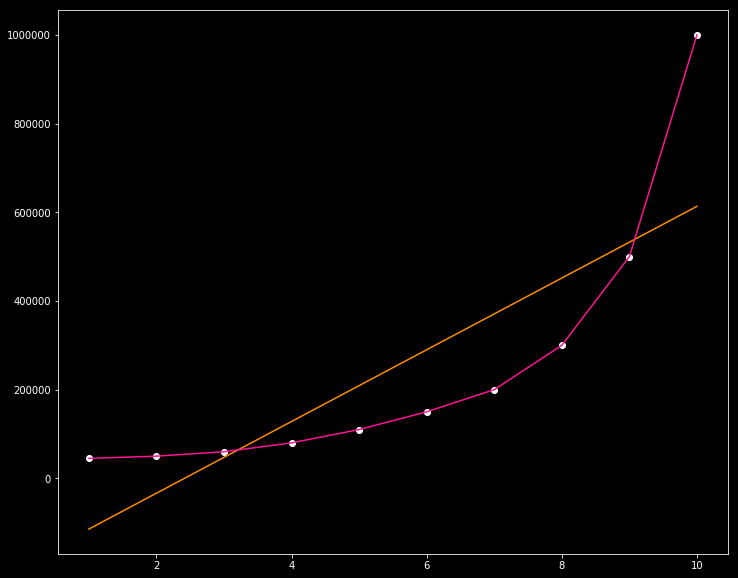

In [126]:
plt.figure(figsize=(12, 10))
plt.scatter(X1, Y1, color = 'white')
plt.plot(X1, Y_hat1, color = 'darkorange')
plt.plot(X1, Y_hat_poly1, color = 'deeppink')
plt.show()

In [ ]:
def error (x, y, it):
    xtrain, ytrain, xtest, ytest = train_test_split(x, y, test_size=0.20, random_state=42)
    rmse_train = []
    rmse_test = []
    for i in range (1:it):
        poly_regressor = PolynomialFeatures(degree = i)
        X_poly = poly_regressor.fit_transform(xtrain)
        regressor = LinearRegression()
        regressor.fit(X_poly, ytrain)
        Y_hat_train = regressor.predict(X_poly)
        rmse_train.append(math.sqrt(mse(ytrain, Y_hat_train))
        Y_hat_test = poly_regressor.predict(poly_regressor.fit_transform(xtest))
        rmse_test.append(math.sqrt(mse(ytest, Y_hat_test))
                         
    plt.figure(figsize=(12, 10))
        
    plt.plot(range(1:it), rmse_train, color = 'darkorange')
    plt.plot(range(1:it), rmse_test, color = 'deeppink')
    plt.show()                 
                        
        
    